## 1. Import python Libraries 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load and Inspect the Dataset

In [2]:
# Load the data
weather_data = pd.read_csv('./weather_data_with_location_2023(2).csv')

# Display the first few rows
print(weather_data.head())

# Display dataset info and summary statistics
print(weather_data.info())
print(weather_data.describe())



         Date    Location  Temperature  Precipitation   Humidity  Wind Speed  \
0  01/01/2023     Karachi     9.129647      11.443869  99.730817    0.715589   
1  02/01/2023      Lahore    13.656015      13.229582  73.176753    7.142511   
2  03/01/2023   Islamabad     8.121951       5.483545  87.310994    5.359975   
3  04/01/2023  Rawalpindi     7.697400      17.721549  34.219825    5.466620   
4  05/01/2023      Quetta     5.300982      16.050540  94.178225    4.482585   

  Conditions  
0      Rainy  
1      Snowy  
2     Cloudy  
3      Snowy  
4     Cloudy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Location       365 non-null    object 
 2   Temperature    365 non-null    float64
 3   Precipitation  365 non-null    float64
 4   Humidity       365 non-null    float64
 5   Wind Speed  

## 3. Data Cleaning

In [3]:
# Remove any hidden characters or whitespace from column names
weather_data.columns = weather_data.columns.str.strip()

# Check the columns again to confirm the cleanup
print(weather_data.columns)


Index(['Date', 'Location', 'Temperature', 'Precipitation', 'Humidity',
       'Wind Speed', 'Conditions'],
      dtype='object')


In [4]:
# Check for missing values
print(weather_data.isnull().sum())


Date             0
Location         0
Temperature      0
Precipitation    0
Humidity         0
Wind Speed       0
Conditions       0
dtype: int64


## 4.  Data Analysis 

In [ ]:
# Convert 'Date' to datetime and set it as the index
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')
weather_data.set_index('Date', inplace=True)

In [8]:
# Monthly averages for Temperature, Precipitation, Humidity, and Wind Speed
# Specify the numeric columns to calculate the averages
numeric_columns = ['Temperature', 'Precipitation', 'Humidity', 'Wind Speed']

# Calculate monthly averages for only the specified columns
monthly_averages = weather_data[numeric_columns].resample('ME').mean()
print("Monthly Averages:\n", monthly_averages)

# Calculate yearly averages for only the specified columns
yearly_averages = weather_data[numeric_columns].resample('YE').mean()
print("Yearly Averages:\n", yearly_averages)


Monthly Averages:
             Temperature  Precipitation   Humidity  Wind Speed
Date                                                         
2023-01-31    19.291729       9.986396  63.174453    5.934949
2023-02-28    14.275267      11.151569  70.624678    8.778054
2023-03-31    19.625690      10.559717  57.866622    7.547593
2023-04-30    18.148995      10.596459  53.202295    5.816156
2023-05-31    17.579149      11.627906  64.210692    5.801507
2023-06-30    18.977076      10.804393  68.373250    8.776327
2023-07-31    13.528689      12.107464  72.707588    5.302663
2023-08-31    12.675449       9.944641  52.324803   10.575047
2023-09-30    13.014757      10.591659  61.388606    9.086773
2023-10-31    17.074942      10.917114  49.600637    5.389476
2023-11-30    11.327053      12.817322  71.432242    7.008287
2023-12-31    11.367651       9.369950  66.642562    6.749569
Yearly Averages:
             Temperature  Precipitation   Humidity  Wind Speed
Date                             

In [9]:
# Aggregating data by location for min, max, and average values
location_stats = weather_data.groupby('Location').agg({
    'Temperature': ['min', 'max', 'mean'],
    'Precipitation': ['min', 'max', 'mean'],
    'Humidity': ['min', 'max', 'mean'],
    'Wind Speed': ['min', 'max', 'mean']
})
print(location_stats)



                Temperature                       Precipitation             \
                        min        max       mean           min        max   
Location                                                                     
Abbottabad        -4.258908  33.121155  14.605508      0.702953  19.442999   
Bahawalpur        -3.382667  34.970850  13.734399      0.797340  19.102906   
Dera Ghazi Khan   -4.498753  33.132976  13.748139      1.539362  17.266866   
Faisalabad        -4.649964  32.250158  13.276438      0.046946  19.874888   
Gujranwala        -2.333301  28.450290  13.945574      0.042897  19.803583   
Gwadar            -3.521584  33.983112  15.702912      1.603126  19.070732   
Hyderabad         -4.455053  32.782855  15.048128      0.994827  19.489213   
Islamabad         -4.357377  33.882798  11.171335      1.016342  17.981571   
Karachi            0.048568  33.055965  15.888376      0.133950  19.991499   
Lahore            -3.078701  33.956709  18.885391      0.192124 

## 5. Data Visualization
# Line Plot for Temperature Trends Over Time:

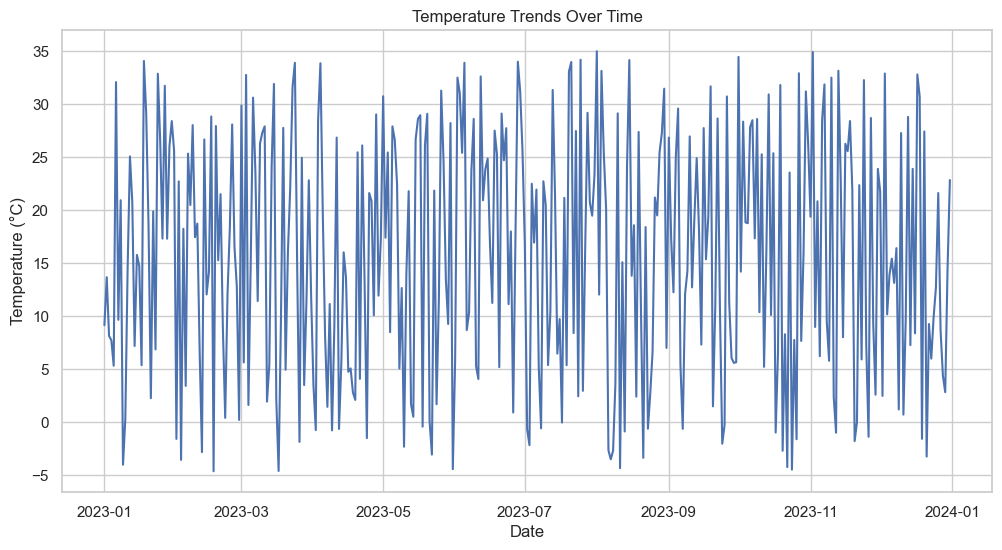

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x=weather_data.index, y='Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()



## Histogram for Temperature Distribution:

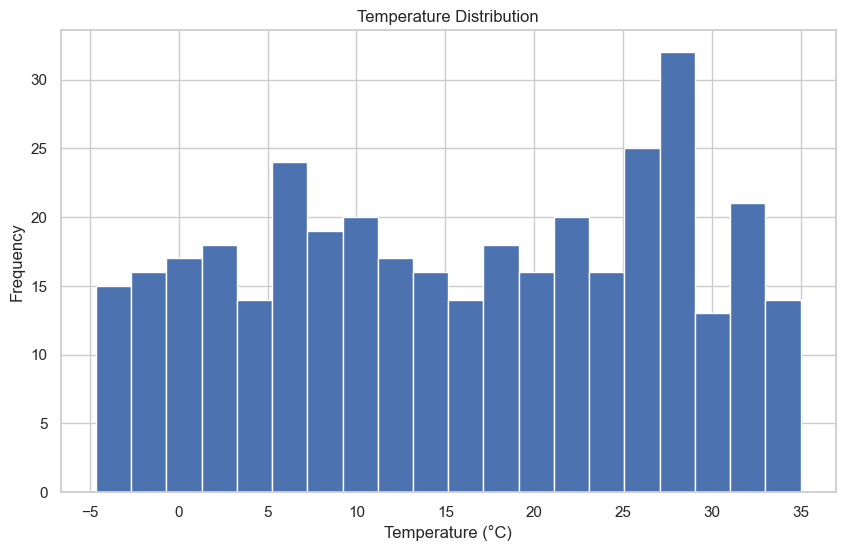

In [29]:
plt.figure(figsize=(10, 6))
weather_data['Temperature'].hist(bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


## Boxplot for Temperature Variations by Location:

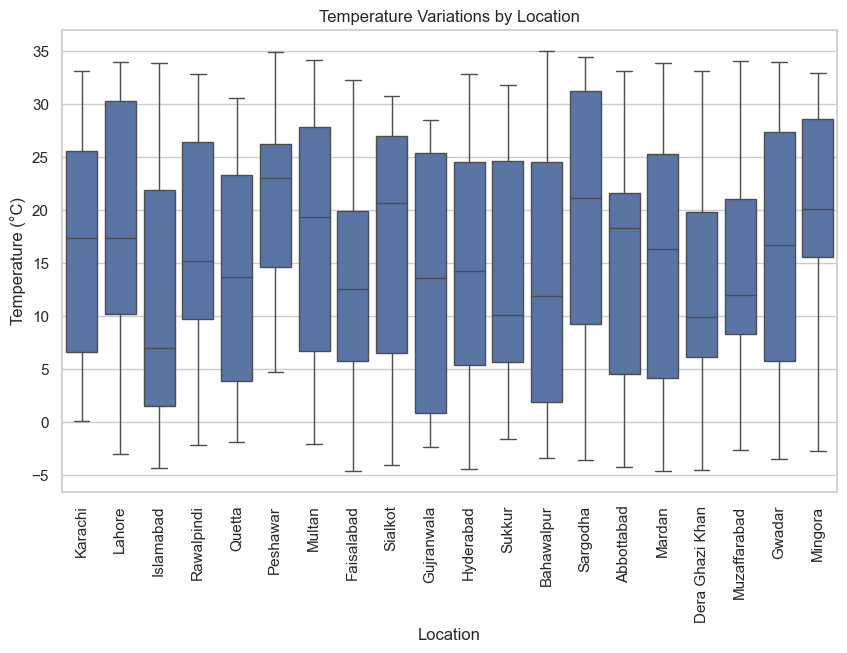

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x='Location', y='Temperature')
plt.title('Temperature Variations by Location')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


## Pie Chart for Weather Conditions:

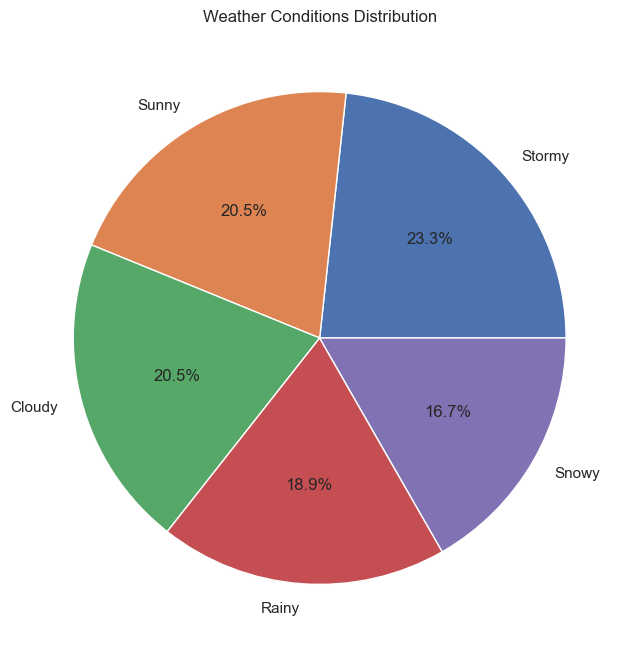

In [33]:
condition_counts = weather_data['Conditions'].value_counts()
plt.figure(figsize=(8, 8))
condition_counts.plot.pie(autopct='%1.1f%%')
plt.title('Weather Conditions Distribution')
plt.ylabel('')
plt.show()

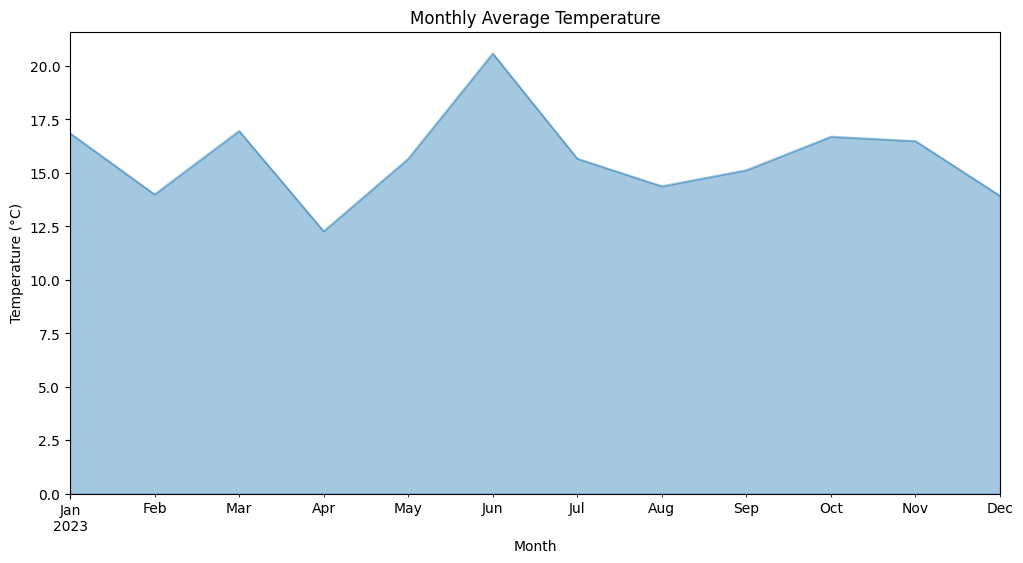

In [16]:
plt.figure(figsize=(12, 6))
monthly_averages['Temperature'].plot(kind='area', alpha=0.4)
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


## Area Chart for Monthly Average Temperature:
# FacetGrid Scatter plots

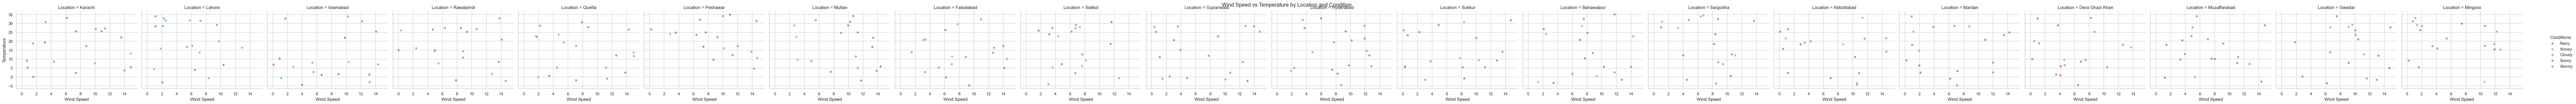

In [36]:
g = sns.FacetGrid(weather_data, col="Location", hue="Conditions", height=4, aspect=1.2)
g.map(sns.scatterplot, "Wind Speed", "Temperature", alpha=.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Wind Speed vs Temperature by Location and Condition')
plt.show()


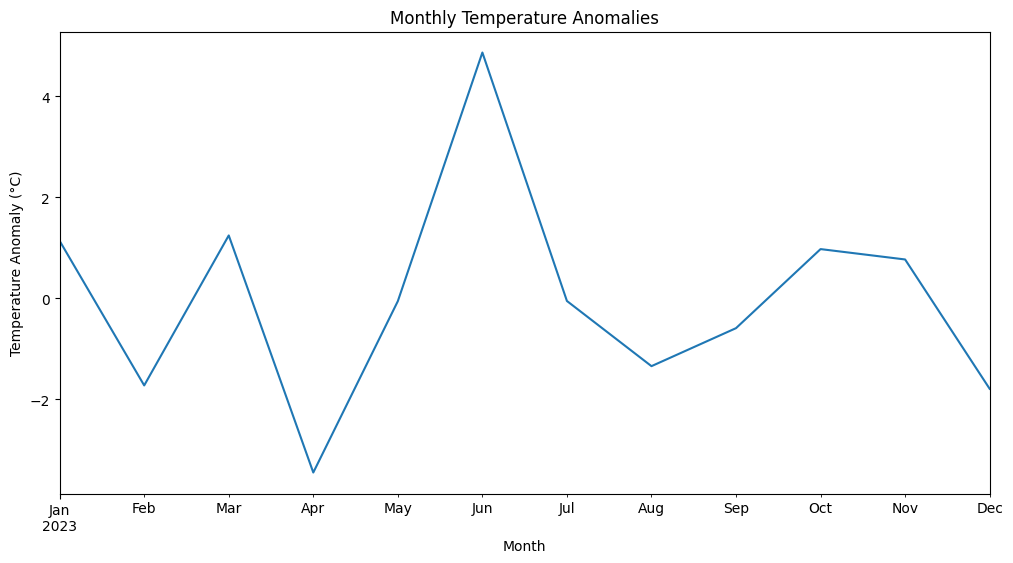

In [18]:
monthly_averages['Temperature_Anomaly'] = monthly_averages['Temperature'] - monthly_averages['Temperature'].mean()
plt.figure(figsize=(12, 6))
monthly_averages['Temperature_Anomaly'].plot()
plt.title('Monthly Temperature Anomalies')
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()


## FacetGrid line plots

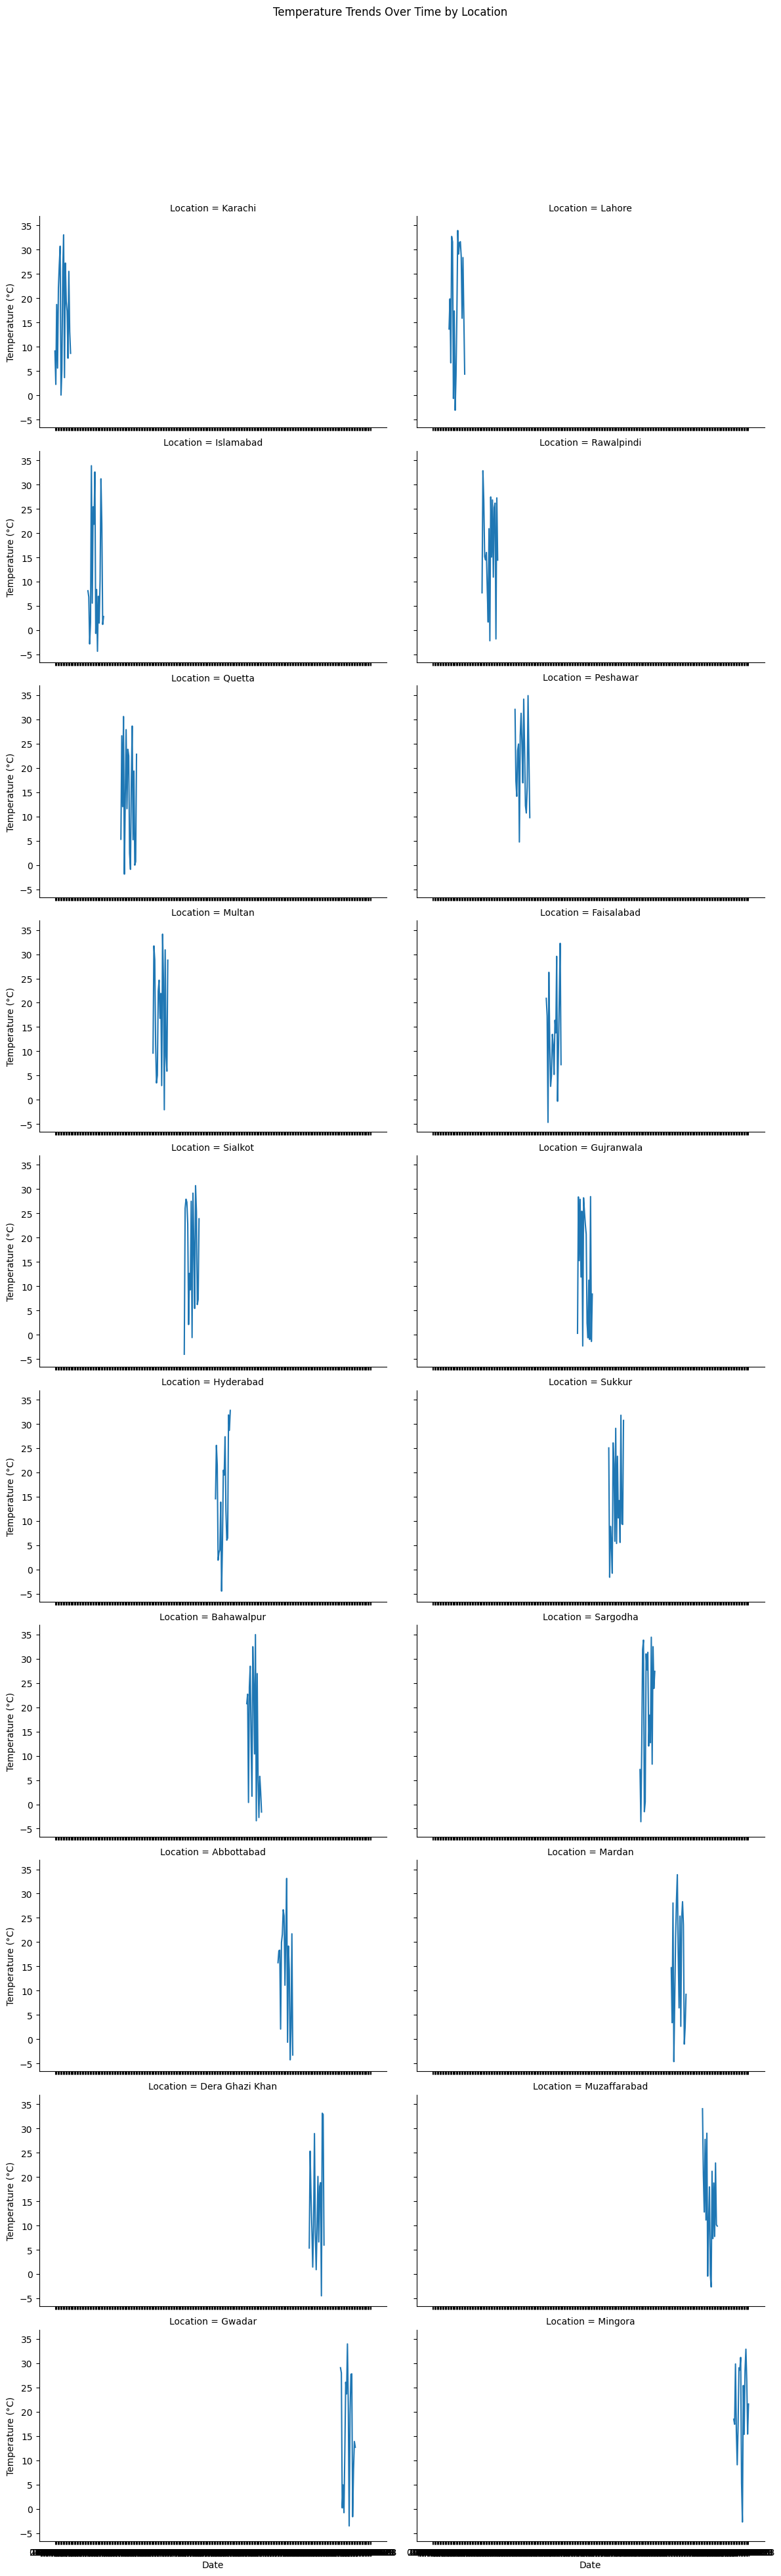

In [14]:
# Create a FacetGrid to plot Temperature Trends Over Time by Location
#weather_data = weather_data.reset_index()

# Create a FacetGrid to plot Temperature Trends Over Time by Location
#g = sns.FacetGrid(weather_data, col="Location", height=4, aspect=1.5)
g = sns.FacetGrid(weather_data, col="Location", col_wrap=2, height=4, aspect=1.5)  # col_wrap=2 to show 2 plots per row
g.map(sns.lineplot, "Date", "Temperature")
g.set_axis_labels("Date", "Temperature (°C)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Trends Over Time by Location')
plt.show()